In [1]:
# Install Java if it’s not already available in your Colab environment
!apt-get install -y openjdk-8-jdk-headless > /dev/null 2>&1


In [2]:
# @title Import Libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from PIL import Image
import subprocess
import os
import base64
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
!pip install gdown

In [22]:
# @title Install Required Files
# Install git
!git clone https://github.com/saiflab/AmyPic.git

# Replace with your actual file ID
file_id = "162s4ZorHK4oQnktlyQ_K2qoFvWOW9pKO"
file_name = "APP_Model.pkl"

# Download using gdown
import gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)


fatal: destination path 'AmyPic' already exists and is not an empty directory.


Downloading...
From (original): https://drive.google.com/uc?id=162s4ZorHK4oQnktlyQ_K2qoFvWOW9pKO
From (redirected): https://drive.google.com/uc?id=162s4ZorHK4oQnktlyQ_K2qoFvWOW9pKO&confirm=t&uuid=041b6819-52ef-4d3e-9bad-f5dfaa562b8e
To: /content/APP_Model.pkl
100%|██████████| 174M/174M [00:02<00:00, 72.7MB/s]


'APP_Model.pkl'

In [43]:
# @title Molecular descriptor calculator
# Display the app title and information
print("""
# Amyloid-Beta Precursor Protein pIC50 value Identification Tools
### Amyloid-Beta Precursor Protein
This notebook allows you to predict the bioactivity towards inhibiting the Human Amyloid-Beta Precursor Protein. APP is a drug target for Alzheimer's disease.

#### Some Important Information:
- Fingerprints used: PubChem Fingerprints
- Model Used: Random Forest Regression
- Descriptor calculated using [PaDEL-Descriptor](http://www.yapcwsoft.com/dd/padeldescriptor/)
""")

# Molecular descriptor calculator
def desc_calc():
    # Performs the descriptor calculation using PaDEL-Descriptor
    bashCommand = "java -Xms2G -Xmx2G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes " \
                  "./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    os.remove('molecule.smi')

# Model building and prediction
def build_model(input_data):
    # Load the pre-trained model
    with open('APP_Model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    # Predict using the model
    predictions = model.predict(input_data)
    prediction_output = pd.Series(predictions, name='pIC50')
    molecule_name = pd.Series(load_data[1], name='molecule_name')
    df = pd.concat([molecule_name, prediction_output], axis=1)

    print("\n**Prediction Output**")
    print(df)

      # Save the output to a CSV file
    df.to_csv('molecule_predictions.csv', index=False)
    print("Predictions saved to 'molecule_predictions.csv'.")

    # Plot the predictions
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(y=df['molecule_name'], x=df['pIC50'], errwidth=0)
    plt.xlabel("pIC50 Values", size=12, fontstyle='normal', weight=600)
    plt.ylabel("Molecule Name", size=12, fontstyle='normal', weight=600)
    plt.title("pIC50 value of various Molecules", fontstyle='normal', weight=600)
    plt.show()




# Amyloid-Beta Precursor Protein pIC50 value Identification Tools
### Amyloid-Beta Precursor Protein
This notebook allows you to predict the bioactivity towards inhibiting the Human Amyloid-Beta Precursor Protein. APP is a drug target for Alzheimer's disease.

#### Some Important Information:
- Fingerprints used: PubChem Fingerprints
- Model Used: Random Forest Regression
- Descriptor calculated using [PaDEL-Descriptor](http://www.yapcwsoft.com/dd/padeldescriptor/)



Please upload your input .txt file (containing SMILES notations):


Saving example.txt to example (1).txt

**Original Input Data**
                                                   0             1
0              CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1  CHEMBL133897
1         O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1  CHEMBL336398
2  CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1  CHEMBL131588
3      O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F  CHEMBL130628
4          CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C  CHEMBL130478

Calculating descriptors...

**Calculated Molecular Descriptors**
           Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0  CHEMBL130478           1           1           0           0           0   
1  CHEMBL130628           1           1           1           0           0   
2  CHEMBL336398           1           1           1           0           0   
3  CHEMBL133897           1           1           1           0           0   
4  CHEMBL131588           1           1           0           0           

<ipython-input-43-f7e9c37330ed>:43: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(y=df['molecule_name'], x=df['pIC50'], errwidth=0)


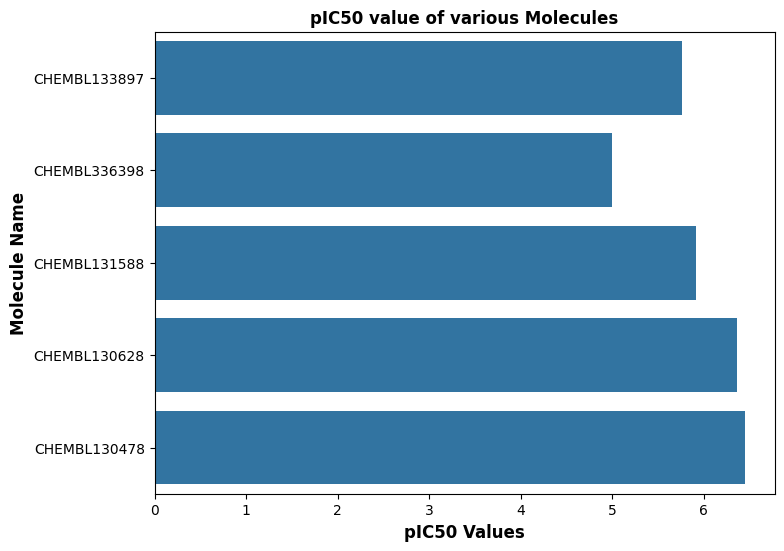

In [44]:
# @title Load File & Make Predictions
# Load the uploaded file
print("Please upload your input .txt file (containing SMILES notations):")
uploaded_file = files.upload()

# Load the uploaded file
for filename in uploaded_file.keys():
    load_data = pd.read_table(filename, sep=' ', header=None)
    load_data.to_csv('molecule.smi', sep='\t', header=False, index=False)
    print("\n**Original Input Data**")
    print(load_data)

# Check if there's a second column for molecule names, else auto-generate names
try:
    molecule_name = pd.Series(load_data[1], name='molecule_name')
except KeyError:
    print("No molecule name column found. Generating default names.")
    molecule_name = pd.Series([f"Molecule_{i}" for i in range(len(load_data))], name='molecule_name')

# Calculate descriptors
print("\nCalculating descriptors...")
desc_calc()

# Load the calculated descriptors
desc = pd.read_csv('/content/AmyPic/descriptors_output.csv')
print("\n**Calculated Molecular Descriptors**")
print(desc)
print("Shape:", desc.shape)

# Load descriptor list used in the previously built model
Xlist = list(pd.read_csv('/content/AmyPic/descriptor_list.csv').columns)
desc_subset = desc[Xlist]
print("\n**Subset of Descriptors from Previously Built Model**")
print(desc_subset)
print("Shape:", desc_subset.shape)

# Apply the trained model to make predictions on query compounds
build_model(desc_subset)
